# config

In [3]:
from dotenv import load_dotenv
from module.for_dataset.create_dataset import create_dataset
from module.for_dataset.normalization import normalization
from module.for_model.training import construct_and_train_model
from module.for_model.checkpoint import save_checkpoint

In [2]:
load_dotenv(".env")

True

# Dataset

In [3]:
X_train, Y_train, X_test, Y_test = create_dataset(0,20000)

## Preprocess

In [4]:
# reshape for the model output
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))


In [5]:
# normalize
normalizer = normalization(X_train)
X_train_n = normalizer.normalize(X_train)
Y_train_n = normalizer.normalize(Y_train)
X_test_n = normalizer.normalize(X_test)
Y_test_n = normalizer.normalize(Y_test)

In [6]:
# zip
data = [X_train_n, Y_train_n, X_test_n, Y_test_n]

# Train and Record

In [7]:
a = "False"
type(a)

str

In [8]:
bool(a)

True

In [9]:
import os
DEBUGGER = os.getenv("DEBUGGER")
DEBUGGER=='False'

True

In [10]:
folder_test_name = "2024_0604_1708"
path_folder = f"checkpoints\\{folder_test_name}"

for n in range(1,21):
    folder_node = f"node_{n:02d}"
    path_folder = f"checkpoints\\{folder_test_name}\\{folder_node}"

    loss_n = []
    param_n = []
    # 用 30 個不同的 randam seed 訓練 30 個不同的模型
    for layer_initializer in range(30):
        ttl_loss, ttl_param = \
            construct_and_train_model(
                n = n,
                layer_initializer = layer_initializer,
                data = data
            )
        loss_n.append(ttl_loss)
        param_n.append(ttl_param)

    save_checkpoint(path_folder, loss_n, param_n)

    

Epoch 0/10	loss_in: 0.0934527942716775,	loss_out: 0.0955928393551263
Epoch 5/10	loss_in: 0.09294010855749815,	loss_out: 0.09508081157706413
Epoch 0/10	loss_in: 0.39327288904911134,	loss_out: 0.39512001131688546
Epoch 5/10	loss_in: 0.38850086263949024,	loss_out: 0.3903500960513246
Epoch 0/10	loss_in: 0.15597323104590186,	loss_out: 0.157833243592655
Epoch 5/10	loss_in: 0.1545777640332608,	loss_out: 0.15644185754955955
Epoch 0/10	loss_in: 0.06867082691050296,	loss_out: 0.07074328144186069
Epoch 5/10	loss_in: 0.06849371209049353,	loss_out: 0.07056560383853702
Epoch 0/10	loss_in: 0.10204078870421536,	loss_out: 0.10466048616556842
Epoch 5/10	loss_in: 0.10142569487049402,	loss_out: 0.10404317636140532
Epoch 0/10	loss_in: 0.04466818248374118,	loss_out: 0.04630703581019388
Epoch 5/10	loss_in: 0.04460652342775954,	loss_out: 0.0462432671415185
Epoch 0/10	loss_in: 0.5456939404418241,	loss_out: 0.547438571486587
Epoch 5/10	loss_in: 0.5374414066114584,	loss_out: 0.5391919330776009
Epoch 0/10	loss_in

# Drawing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from module.for_model.checkpoint import load_checkpoint

In [46]:
# load Checkpoint
def load_loss(n):
    folder_test_name = "2024_0604_1708"
    folder_node = f"node_{n:02d}"
    path_folder = f"checkpoints\\{folder_test_name}\\{folder_node}"
    record_loss, _ = load_checkpoint(path_folder)
    record_loss = np.array(record_loss)
    return record_loss[:,0,0]

data = [load_loss(n) for n in range(1,21)]


In [2]:
from module.draw.draw import specific_loss

name_test = "2024_0604_1708"
n = 1
type_loss = 0
idx_checkpoint=None

result_loss, result_idx = specific_loss(name_test, n, type_loss, idx_checkpoint)

In [3]:
from module.for_model.checkpoint import load_checkpoint
path_folder = f"checkpoints\\{name_test}\\node_{n:02d}"
ttl_loss = load_checkpoint(path_folder, "loss")

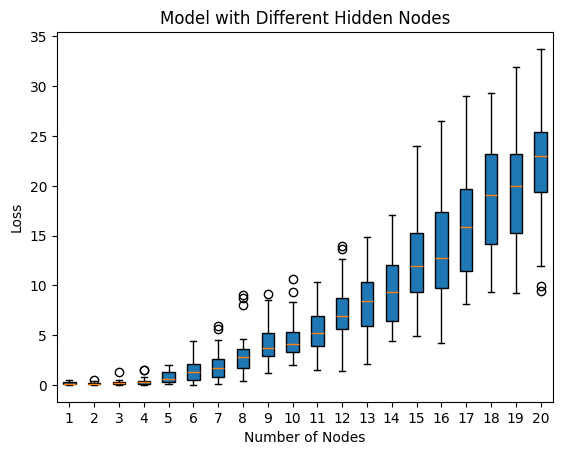

In [47]:
plt.boxplot(data, patch_artist=True)

# 添加标题和标签
plt.title("Model with Different Hidden Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Loss")

# 显示图表
plt.show()

## 盒鬚圖

ValueError: X must have 2 or fewer dimensions

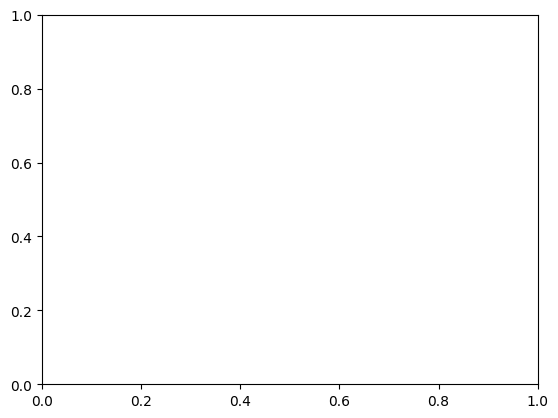

In [17]:

# 繪製盒鬚圖
plt.boxplot(data)
plt.title('Boxplot Example')
plt.ylabel('Values')
plt.show()
